## Import and Prepare data

## Import Common Modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path1 = "/content/drive/My Drive/Data/RawData.xlsx"

In [0]:
df1 = pd.read_excel(path1,sheet_name=0) # Year 2009-2010

In [6]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [0]:
df2 = pd.read_excel(path1,sheet_name=1) # Year 2010-2011

In [8]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory Data Analysis

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
CustomerID     417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null datetime64[ns]
Price          541910 non-null float64
CustomerID     406830 non-null float64
Country        541910 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Looks like there are some null values in **Description** and **CustomerID** columns

In [11]:
df1.CustomerID.isnull().value_counts()

False    417534
True     107927
Name: CustomerID, dtype: int64

In [12]:
df2.CustomerID.isnull().value_counts()

False    406830
True     135080
Name: CustomerID, dtype: int64

In [13]:
df1.Description.isnull().value_counts()

False    522533
True       2928
Name: Description, dtype: int64

In [14]:
df2.Description.isnull().value_counts()

False    540456
True       1454
Name: Description, dtype: int64

In [15]:
df1.Country.nunique()

40

In [16]:
df2.Country.nunique()

38

**Two country values are missing in 2010 dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b2fccd2b0>,
      dtype=object)

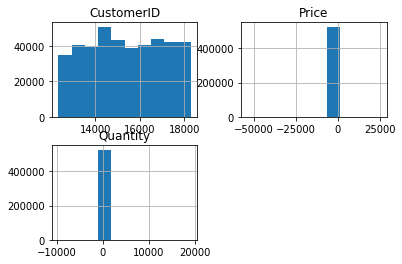

In [17]:
df1.hist()

#### Some Price and Quantity values are in negative which needs to be removed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b3e7422b0>,
      dtype=object)

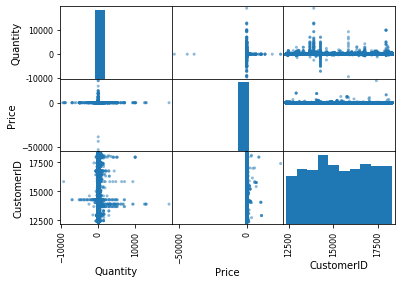

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1)

Text(0.5, 1.0, 'No. of gift items sold per transaction in 2009-2010')

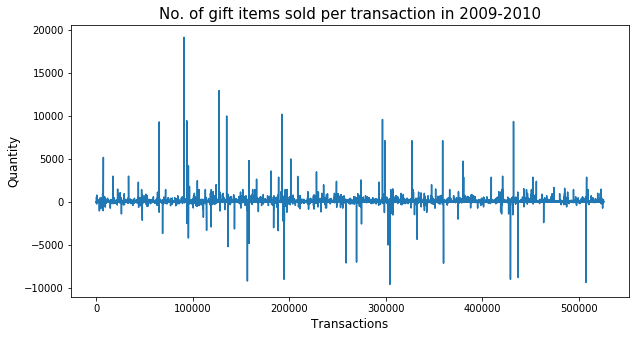

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df1.Quantity)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2009-2010', fontsize=15)

Text(0.5, 1.0, 'No. of gift items sold per transaction in 2010-2011')

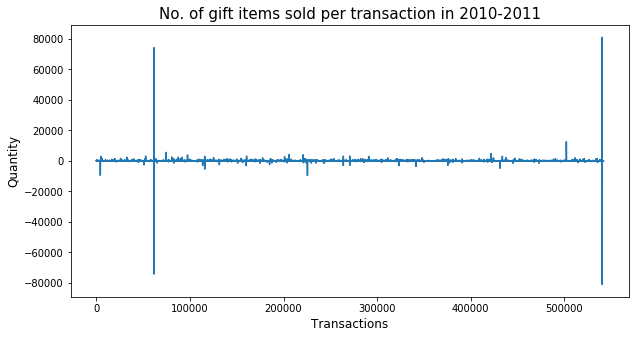

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df2.Quantity)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2010-2011', fontsize=15)

Text(0.5, 1.0, 'Unit Price per transaction in 2009-2010')

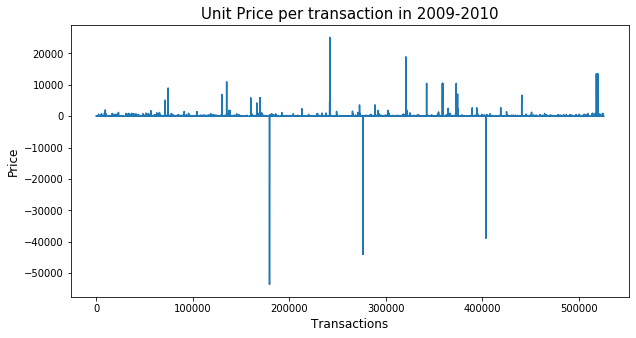

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df1.Price)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Unit Price per transaction in 2009-2010', fontsize=15)

Text(0.5, 1.0, 'Unit Price per transaction in 2010-2011')

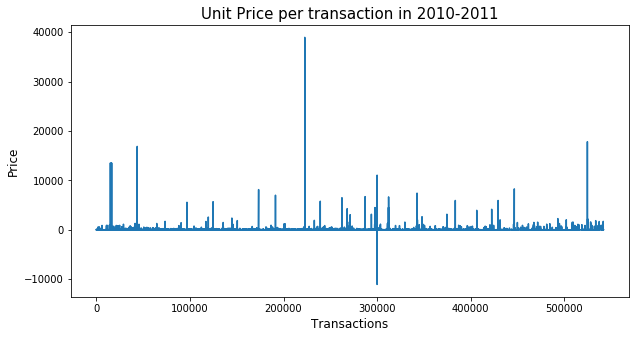

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df2.Price)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Unit Price per transaction in 2010-2011', fontsize=15)

## Clean Data
Remove invalid records 
*   All records containing null values CustomerID and Description
*   All records that have negative Quantity and Price values





In [0]:
df1.dropna(how='any', axis=0, inplace=True)  # when inplace = True, no need to assign a variable

In [0]:
df2.dropna(how='any', axis=0, inplace=True)  

Text(0.5, 1.0, 'No. of gift items sold per transaction in 2009-2010')

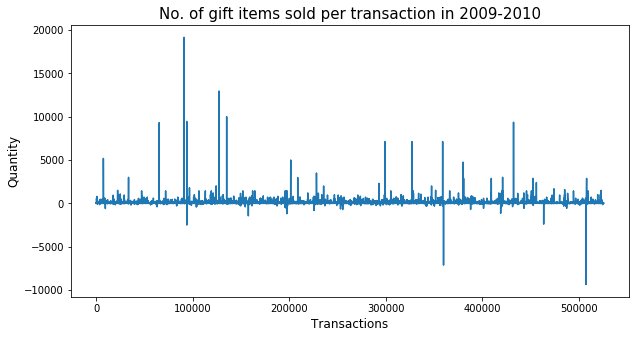

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df1.Quantity)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2009-2010', fontsize=15)

Above graph shows that there are still some negative quantity values for 2010

Maximum Quantity value:  19152
Minimum Quantity value:  1


Text(0.5, 1.0, 'No. of gift items sold per transaction in 2009-2010')

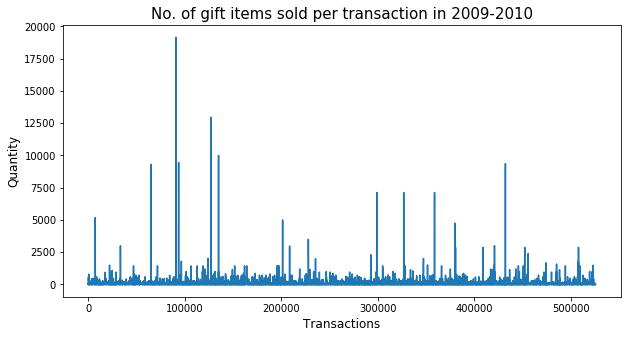

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
df1 = df1[df1["Quantity"]>0]
print ("Maximum Quantity value: ", df1.Quantity.max())
print ("Minimum Quantity value: ", df1.Quantity.min())
fig = plt.plot(df1.Quantity) # considering only the positive values of quantity
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2009-2010', fontsize=15)

Text(0.5, 1.0, 'No. of gift items sold per transaction in 2010-2011')

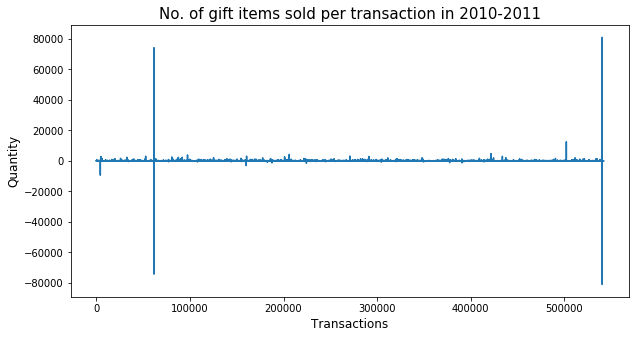

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df2.Quantity)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2010-2011', fontsize=15)

Above graph shows that there are still some negative quantity values for 2011

Maximum Quantity value:  80995
Minimum Quantity value:  1


Text(0.5, 1.0, 'No. of gift items sold per transaction in 2010-2011')

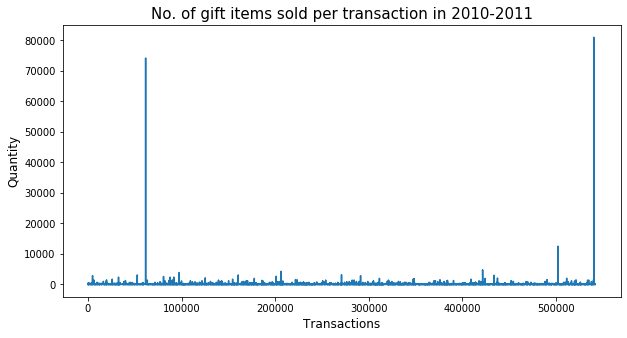

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
df2 = df2[df2["Quantity"]>0]
print ("Maximum Quantity value: ", df2.Quantity.max())
print ("Minimum Quantity value: ", df2.Quantity.min())
fig = plt.plot(df2.Quantity) # considering only the positive values of quantity
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('No. of gift items sold per transaction in 2010-2011', fontsize=15)

Text(0.5, 1.0, 'Unit Price per transaction in 2009-2010')

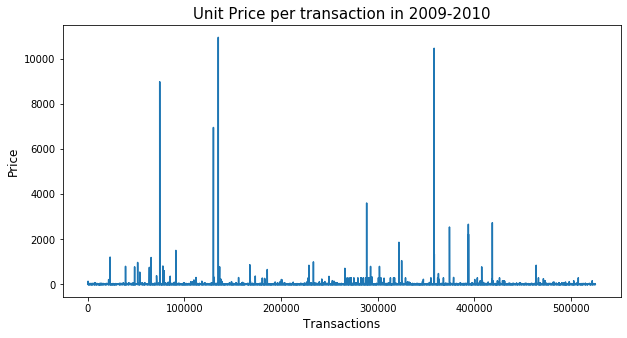

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df1.Price)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Unit Price per transaction in 2009-2010', fontsize=15)

Price values are all positive for 2010

Text(0.5, 1.0, 'Unit Price per transaction in 2010-2011')

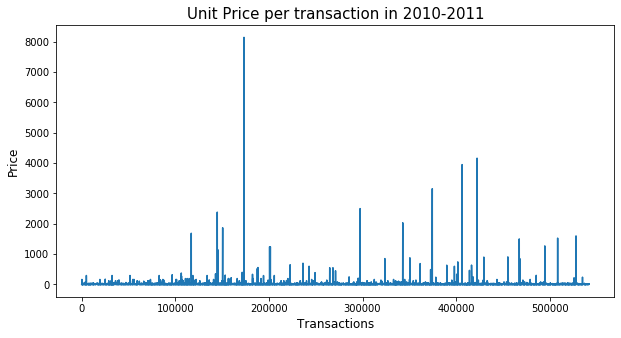

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(df2.Price)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Unit Price per transaction in 2010-2011', fontsize=15) 

Price values are all positive for 2011

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        407695 non-null object
StockCode      407695 non-null object
Description    407695 non-null object
Quantity       407695 non-null int64
InvoiceDate    407695 non-null datetime64[ns]
Price          407695 non-null float64
CustomerID     407695 non-null float64
Country        407695 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        397925 non-null object
StockCode      397925 non-null object
Description    397925 non-null object
Quantity       397925 non-null int64
InvoiceDate    397925 non-null datetime64[ns]
Price          397925 non-null float64
CustomerID     397925 non-null float64
Country        397925 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [33]:
df1.reset_index(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407695 entries, 0 to 407694
Data columns (total 9 columns):
index          407695 non-null int64
Invoice        407695 non-null object
StockCode      407695 non-null object
Description    407695 non-null object
Quantity       407695 non-null int64
InvoiceDate    407695 non-null datetime64[ns]
Price          407695 non-null float64
CustomerID     407695 non-null float64
Country        407695 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 28.0+ MB


In [0]:
df1.drop(['index'], axis=1,inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407695 entries, 0 to 407694
Data columns (total 8 columns):
Invoice        407695 non-null object
StockCode      407695 non-null object
Description    407695 non-null object
Quantity       407695 non-null int64
InvoiceDate    407695 non-null datetime64[ns]
Price          407695 non-null float64
CustomerID     407695 non-null float64
Country        407695 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.9+ MB


In [36]:
df2.reset_index(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397925 entries, 0 to 397924
Data columns (total 9 columns):
index          397925 non-null int64
Invoice        397925 non-null object
StockCode      397925 non-null object
Description    397925 non-null object
Quantity       397925 non-null int64
InvoiceDate    397925 non-null datetime64[ns]
Price          397925 non-null float64
CustomerID     397925 non-null float64
Country        397925 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 27.3+ MB


In [37]:
df2.drop(['index'], axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397925 entries, 0 to 397924
Data columns (total 8 columns):
Invoice        397925 non-null object
StockCode      397925 non-null object
Description    397925 non-null object
Quantity       397925 non-null int64
InvoiceDate    397925 non-null datetime64[ns]
Price          397925 non-null float64
CustomerID     397925 non-null float64
Country        397925 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


The above results show that there are no null values in the dataset

## Removing duplicate rows

In [38]:
df1.duplicated().sum()

6748

In [39]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [40]:
df2.duplicated().sum()

5192

In [41]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

## Deleting special code products as they don't count towards sale

In [42]:
df1['StockCode']=df1.StockCode.astype('str')
list_special_codes = df1[df1['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS',
       'ADJUST', 'D', 'ADJUST2', 'SP1002'], dtype=object)

In [0]:
df1 = df1.drop(df1[df1['StockCode'].str.contains('^[a-zA-Z]+', regex = True)].index)

In [44]:
df2['StockCode']=df2.StockCode.astype('str')
list_special_codes = df2[df2['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [0]:
df2 = df2.drop(df2[df2['StockCode'].str.contains('^[a-zA-Z]+', regex = True)].index)

In [46]:
df1.reset_index(drop=True, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399580 entries, 0 to 399579
Data columns (total 8 columns):
Invoice        399580 non-null object
StockCode      399580 non-null object
Description    399580 non-null object
Quantity       399580 non-null int64
InvoiceDate    399580 non-null datetime64[ns]
Price          399580 non-null float64
CustomerID     399580 non-null float64
Country        399580 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.4+ MB


In [47]:
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396370 entries, 0 to 396369
Data columns (total 8 columns):
Invoice        396370 non-null object
StockCode      396370 non-null object
Description    396370 non-null object
Quantity       396370 non-null int64
InvoiceDate    396370 non-null datetime64[ns]
Price          396370 non-null float64
CustomerID     396370 non-null float64
Country        396370 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.2+ MB


## Storing the clean data in a different file

In [0]:
path2 = "/content/drive/My Drive/Data/CleanData.xlsx"

In [0]:
from pandas import ExcelWriter
with ExcelWriter(path2) as writer:
  df1.to_excel(writer, sheet_name='Sheet1')
  df2.to_excel(writer, sheet_name='Sheet2')

## Prepare Data for modelling

In [0]:
df1 = pd.read_excel(path2,sheet_name=0, index_col=0)

In [51]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [0]:
df2 = pd.read_excel(path2,sheet_name=1, index_col=0) 

In [53]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [54]:
df1['Year'] = pd.to_datetime( df1['InvoiceDate']).dt.year
df1.Year.value_counts()

2010    369366
2009     30214
Name: Year, dtype: int64

In [55]:
df1 = df1[df1['Year'] > 2009] # Discarding 2009 december data and considering data from Jan 2010 to Dec 2010
df1.Year.value_counts()

2010    369366
Name: Year, dtype: int64

In [56]:
df1['Month'] = pd.to_datetime(df1['InvoiceDate']).dt.month
df1.Month.value_counts()

11    58721
10    48575
9     34000
3     31648
6     30598
5     28152
4     26722
7     26548
8     25949
2     22954
1     21373
12    14126
Name: Month, dtype: int64

In [0]:
df1['Day'] = pd.to_datetime(df1['InvoiceDate']).dt.date

The above results show how many times each month occurs in dataset\
In other words, for Ex. there were 21778 transactions in January

In [58]:
df2['Year'] = pd.to_datetime(df2['InvoiceDate']).dt.year
df2.Year.value_counts()

2011    370311
2010     26059
Name: Year, dtype: int64

In [59]:
df2 = df2[df2['Year'] > 2010] # Discarding 2010 december data and considering data from Jan 2011 to Dec 2011
df2.Year.value_counts()

2011    370311
Name: Year, dtype: int64

In [60]:
df2['Month'] = pd.to_datetime(df2['InvoiceDate']).dt.month
df2.Month.value_counts()

11    64312
10    49369
9     39869
5     28209
6     27079
3     27057
8     26905
7     26721
4     22556
1     21140
2     19852
12    17242
Name: Month, dtype: int64

In [0]:
df2['Day'] = pd.to_datetime(df2['InvoiceDate']).dt.date

In [62]:
df1['TotalCost'] = df1['Quantity'] * df1['Price']
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Day,TotalCost
30214,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590,United Kingdom,2010,1,2010-01-04,91.8
30215,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590,United Kingdom,2010,1,2010-01-04,51.0
30216,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590,United Kingdom,2010,1,2010-01-04,5.1
30217,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,2010,1,2010-01-04,8.5
30218,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,2010,1,2010-01-04,83.4


In [63]:
df2['TotalCost'] = df2['Quantity'] * df2['Price']
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Day,TotalCost
26059,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011,1,2011-01-04,19.5
26060,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,2011-01-04,10.5
26061,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,2011-01-04,10.5
26062,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011,1,2011-01-04,10.5
26063,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011,1,2011-01-04,12.5


In [64]:
df1['InvoiceTotal'] = df1.groupby('Invoice').TotalCost.transform('sum')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369366 entries, 30214 to 399579
Data columns (total 13 columns):
Invoice         369366 non-null int64
StockCode       369366 non-null object
Description     369366 non-null object
Quantity        369366 non-null int64
InvoiceDate     369366 non-null datetime64[ns]
Price           369366 non-null float64
CustomerID      369366 non-null int64
Country         369366 non-null object
Year            369366 non-null int64
Month           369366 non-null int64
Day             369366 non-null object
TotalCost       369366 non-null float64
InvoiceTotal    369366 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 39.5+ MB


In [65]:
df2['InvoiceTotal'] = df2.groupby('Invoice').TotalCost.transform('sum')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370311 entries, 26059 to 396369
Data columns (total 13 columns):
Invoice         370311 non-null int64
StockCode       370311 non-null object
Description     370311 non-null object
Quantity        370311 non-null int64
InvoiceDate     370311 non-null datetime64[ns]
Price           370311 non-null float64
CustomerID      370311 non-null int64
Country         370311 non-null object
Year            370311 non-null int64
Month           370311 non-null int64
Day             370311 non-null object
TotalCost       370311 non-null float64
InvoiceTotal    370311 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 39.6+ MB


In [66]:
df1.reset_index(drop=True, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369366 entries, 0 to 369365
Data columns (total 13 columns):
Invoice         369366 non-null int64
StockCode       369366 non-null object
Description     369366 non-null object
Quantity        369366 non-null int64
InvoiceDate     369366 non-null datetime64[ns]
Price           369366 non-null float64
CustomerID      369366 non-null int64
Country         369366 non-null object
Year            369366 non-null int64
Month           369366 non-null int64
Day             369366 non-null object
TotalCost       369366 non-null float64
InvoiceTotal    369366 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 36.6+ MB


In [67]:
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370311 entries, 0 to 370310
Data columns (total 13 columns):
Invoice         370311 non-null int64
StockCode       370311 non-null object
Description     370311 non-null object
Quantity        370311 non-null int64
InvoiceDate     370311 non-null datetime64[ns]
Price           370311 non-null float64
CustomerID      370311 non-null int64
Country         370311 non-null object
Year            370311 non-null int64
Month           370311 non-null int64
Day             370311 non-null object
TotalCost       370311 non-null float64
InvoiceTotal    370311 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 36.7+ MB


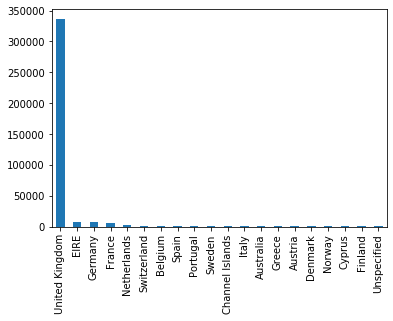

In [96]:
df1['Country'].value_counts()[:20].plot(kind='bar')
plt.show()

In [69]:
print ("Top 5 most frequent values in Year 2010...")
print("Most frequent products:\n", df1['StockCode'].value_counts().head(5), "\n")
print("Most frequent products:\n", df1['Description'].value_counts().head(5), "\n")
print("Frequently buying customers:\n", df1['CustomerID'].value_counts().head(5), "\n")
print("Frequent Quantity:\n", df1['Quantity'].value_counts().head(5), "\n")
print("What price was most frequent:\n", df1['Price'].value_counts().head(5))

Top 5 most frequent values in Year 2010...
Most frequent products:
 85123A    2824
22423     1696
85099B    1611
21212     1439
20725     1264
Name: StockCode, dtype: int64 

Most frequent products:
 WHITE HANGING HEART T-LIGHT HOLDER    2824
REGENCY CAKESTAND 3 TIER              1696
ASSORTED COLOUR BIRD ORNAMENT         1256
STRAWBERRY CERAMIC TRINKET BOX        1226
HOME BUILDING BLOCK WORD              1110
Name: Description, dtype: int64 

Frequently buying customers:
 14911    5234
17841    4428
14606    3489
12748    2433
14156    2368
Name: CustomerID, dtype: int64 

Frequent Quantity:
 1     68511
12    55714
2     54608
6     38926
4     27576
Name: Quantity, dtype: int64 

What price was most frequent:
 1.25    47046
2.95    33114
0.85    32471
1.65    31831
2.10    21825
Name: Price, dtype: int64


In [70]:
print ("Top 5 most frequent values in Year 2011...")
print("Most frequent products:\n", df2['StockCode'].value_counts().head(5), "\n")
print("Most frequent products:\n", df2['Description'].value_counts().head(5), "\n")
print("Frequently buying customers:\n", df2['CustomerID'].value_counts().head(5), "\n")
print("Frequent Quantity:\n", df2['Quantity'].value_counts().head(5), "\n")
print("What price was most frequent:\n", df2['Price'].value_counts().head(5))

Top 5 most frequent values in Year 2011...
Most frequent products:
 85123A    1828
22423     1583
85099B    1534
47566     1374
84879     1314
Name: StockCode, dtype: int64 

Most frequent products:
 WHITE HANGING HEART T-LIGHT HOLDER    1821
REGENCY CAKESTAND 3 TIER              1583
JUMBO BAG RED RETROSPOT               1534
PARTY BUNTING                         1374
ASSORTED COLOUR BIRD ORNAMENT         1314
Name: Description, dtype: int64 

Frequently buying customers:
 17841    7551
14911    5304
14096    5095
12748    3918
14606    2469
Name: CustomerID, dtype: int64 

Frequent Quantity:
 1     66527
12    56545
2     53949
6     35052
4     30128
Name: Quantity, dtype: int64 

What price was most frequent:
 1.25    42546
1.65    34780
2.95    24085
0.85    23838
0.42    20584
Name: Price, dtype: int64


In [0]:
 df1_monthly = df1.filter(["CustomerID", "Year", "Month", "TotalCost"])

In [72]:
revenue_per_month_2010 = df1_monthly.groupby(['Month'], as_index=False)['TotalCost'].sum()
revenue_per_month_2010.head()

,Month,TotalCost
0,1,533712.98
1,2,497937.57
2,3,665973.67
3,4,585127.43
4,5,592734.13


Text(0.5, 1.0, 'Revenue per Month in Year 2010')

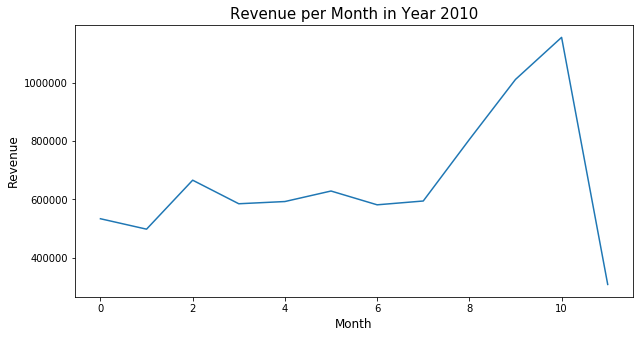

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(revenue_per_month_2010.TotalCost)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue per Month in Year 2010', fontsize=15) 

In [0]:
 df2_monthly = df2.filter(["CustomerID", "Year", "Month", "TotalCost"])

In [75]:
revenue_per_month_2011 = df2_monthly.groupby(['Month'], as_index=False)['TotalCost'].sum()
revenue_per_month_2011.head()

,Month,TotalCost
0,1,564026.64
1,2,443346.02
2,3,584562.85
3,4,455266.91
4,5,660481.90


Text(0.5, 1.0, 'Revenue per Month in Year 2011')

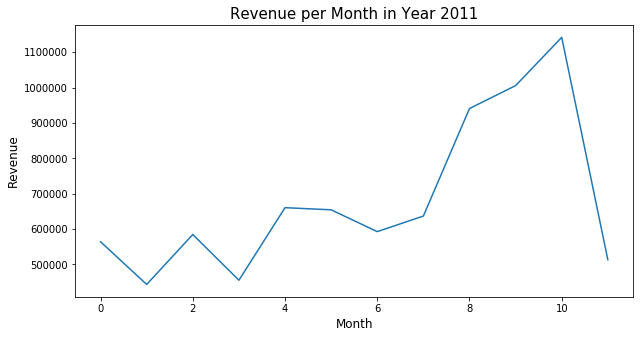

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(revenue_per_month_2011.TotalCost)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue per Month in Year 2011', fontsize=15) 

In [77]:
df1_monthly = df1.groupby(['CustomerID','Month'], as_index=False)['InvoiceTotal'].sum()
df1_monthly.head(5)

,CustomerID,Month,InvoiceTotal
0,12346,3,135.25
1,12346,6,2703.89
2,12347,10,24461.20
3,12347,12,22065.49
4,12348,9,4202.04


In [78]:
df2_monthly = df2.groupby(['CustomerID','Month'], as_index=False)['InvoiceTotal'].sum()
df2_monthly.head(5)

,CustomerID,Month,InvoiceTotal
0,12346,1,77183.60
1,12347,1,13786.31
2,12347,4,15270.00
3,12347,6,6885.36
4,12347,8,12868.02


In [0]:
path_train_data = "/content/drive/My Drive/Data/TrainData.xlsx"
path_test_data = "/content/drive/My Drive/Data/TestData.xlsx"

from pandas import ExcelWriter

with ExcelWriter(path_train_data) as writer:
  df1_monthly.to_excel(writer, sheet_name='Sheet1')

with ExcelWriter(path_test_data) as writer:
  df2_monthly.to_excel(writer, sheet_name='Sheet1')